In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)
df['price'].shape

(20,)

In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
scaled_y.reshape(scaled_y.shape[0], )
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
np.dot(np.ones(shape=(scaled_X.shape[1])), scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [8]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    bias = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + bias

        w_grad = (2/total_samples)*np.dot(X.T, y_predicted-y_true)
        b_grad=  (2/total_samples)*np.sum(y_predicted-y_true)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*b_grad 

        cost = np.mean(np.square(y_true-y_predicted))

        if(i%10 == 0):
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost, cost_list, epoch_list

w, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, bias, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

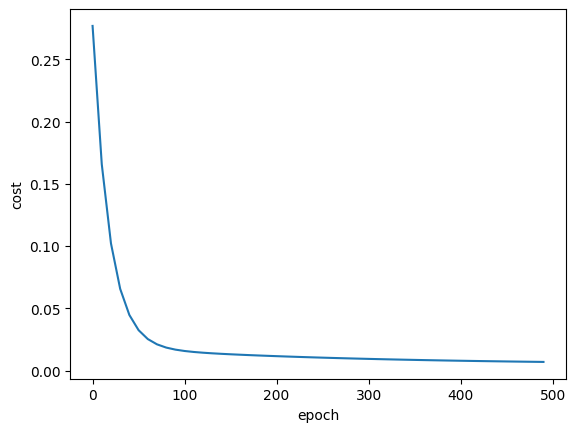

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [10]:
def predict(X):
    total_samples = X.shape[0]
    if(X.ndim == 1):
        X_scaled = sx.transform(X.values.reshape(1, -1)) #2D array
    else:
        X_scaled = sx.transform(X)
    
    y = np.dot(w, X_scaled.T) + bias
    y_predicted = sy.inverse_transform(y.reshape(-1, 1)) #2D array
    return y_predicted
    #print(y)

X = df.drop('price', axis='columns')
y = df['price']

yp = predict(X.loc[0:25])
#y.iloc[:3, ]
#predict(pd.DataFrame({'x':[2600], 'y':[4]}))
#scaled_X[0:3]
#scaled_y.reshape(-1, 1)
#print(y[0:25])
[(yp[i], y.iloc[i]) for i in range(19)]


[(array([32.09649526]), 39.07),
 (array([128.45484403]), 120.0),
 (array([67.50353558]), 62.0),
 (array([70.16988315]), 75.0),
 (array([36.83666872]), 51.0),
 (array([35.84913258]), 38.0),
 (array([132.80000304]), 135.0),
 (array([151.49735394]), 155.0),
 (array([63.22421231]), 50.0),
 (array([187.43108021]), 167.0),
 (array([79.35396925]), 82.0),
 (array([134.54465022]), 140.0),
 (array([30.25309446]), 38.0),
 (array([33.54488159]), 40.0),
 (array([94.16701133]), 101.0),
 (array([36.01372194]), 42.0),
 (array([58.94488904]), 48.0),
 (array([70.79532271]), 60.0),
 (array([111.28430441]), 102.0)]

In [11]:
def stochastic_gradient_descent(X, y, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    import random
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y[random_index]
        y_predicted = np.dot(w, sample_x.T) + bias

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*b_grad

        cost = np.square(sample_y-y_predicted)

        if(i%100 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 10000)
w_sgd, b_sgd, cost_sgd



(array([0.71104032, 0.67555482]), -0.23318469321084614, 0.006197896000458254)

In [12]:
w, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

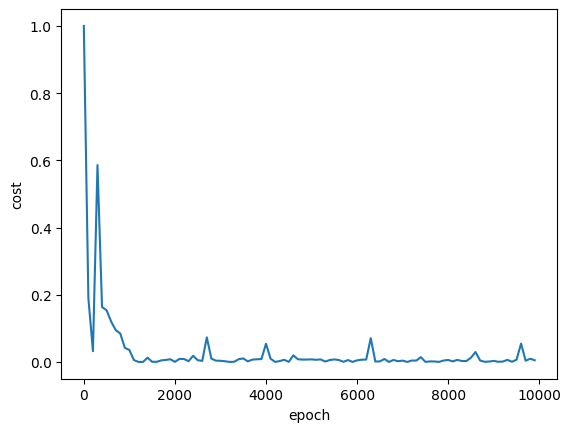

In [13]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [24]:
X[18:]

,area,bedrooms
18,2770,3
19,800,1


In [75]:
def mini_batch_gradient_descent(X, y, epochs, batch_size = 5, learning_rate=0.01):
    total_features = X.shape[1]
    w = np.ones(shape=(total_features))
    bias = 0
    epochs_list = []
    cost_list = []
    total_samples = X.shape[0]

    for i in range(epochs):
        '''r1 = (batch * 5) % total_samples
        r2 = ((batch+1) * 5) % total_samples
        X_mb = X[r1: r2]
        if(r1 < r2):
            X_mb = X[r1:r2]
            y_mb = y[r1:r2]
        else:
            X_mb = np.concatenate((X[r1:], X[:r2]))
            y_mb = np.concatenate((y[r1:], y[:r1]))'''
        random_indices = np.random.permutation(total_samples)
        X_r = X[random_indices]
        y_r = y[random_indices]
        for j in range(0, total_samples, batch_size):
            X_mb = X_r[j:j+batch_size] 
            y_mb = y_r[j:j+batch_size]
            y_predicted = np.dot(w, X_mb.T) + bias
            
            wg = -(2/batch_size)*X_mb.T.dot(y_mb - y_predicted)
            bg = -(2/batch_size)*np.sum(y_mb - y_predicted)

            w = w - learning_rate*wg
            bias = bias - learning_rate*bg

            cost = np.mean(np.square(y_mb - y_predicted))

        if(i % 10 == 0):
            cost_list.append(cost)
            epochs_list.append(i)
        #batch += 1 % batch_size
    return w, bias, cost, cost_list, epochs_list

w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 120)
w_mb, b_mb, cost_mb

(array([0.71009512, 0.67795535]), -0.23356561289938885, 0.004628098177364857)

In [68]:
w, bias, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [69]:
w_sgd, b_sgd, cost_sgd

(array([0.71104032, 0.67555482]), -0.23318469321084614, 0.006197896000458254)

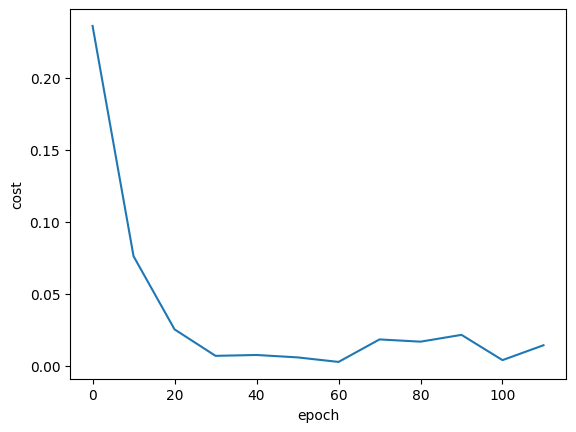

In [74]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mb, cost_list_mb)